# Description

This script is for testing the functions in src/project_package/run_model.py

# Functions

In [2]:
# import networkx as nx
# from collections import Counter
# import numpy as np
# from itertools import combinations
import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# import seaborn as sns
# import pandas as pd


%matplotlib inline
%load_ext autoreload
%autoreload 2

# update_pop

[(0, {'abundance': 4, 'fitness': 0.5}), (1, {'abundance': 8, 'fitness': 0.25})]
[(0, {'abundance': 5, 'fitness': 0.5}), (1, {'abundance': 6, 'fitness': 0.25}), (2, {'abundance': 1, 'fitness': 0.23946892925519908})]


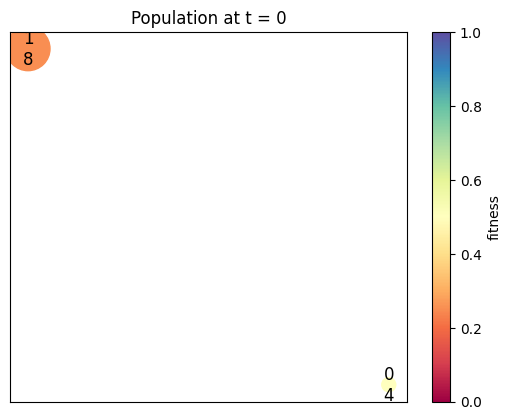

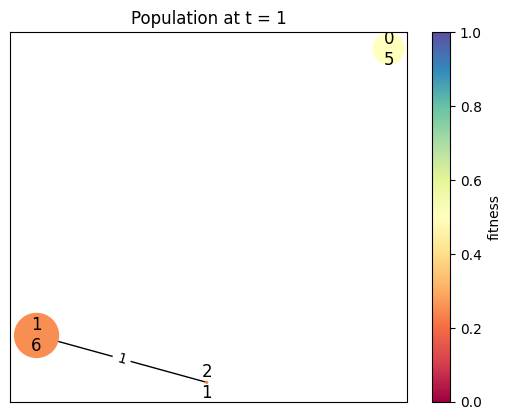

In [4]:
from project_package.generate_pop import generate_initial_pop_unlinked
from project_package.plot import visualize_pop
from project_package.run_model import update_pop

###########
seed=66

fitnesses=[0.5,0.25] # allele_id:fitness
abundances=[4,8] # allele_id:abundance

mutation_rate=0.05

G=generate_initial_pop_unlinked(fitnesses,abundances)
print([(node,attr) for node,attr in G.nodes(data=True)])

newG=update_pop(G,mutation_rate)

print([(node,attr) for node,attr in newG.nodes(data=True)])

visualize_pop(G)
plt.figure()
visualize_pop(newG,i=1)


# run_until_fixation

50
100
150
200
202


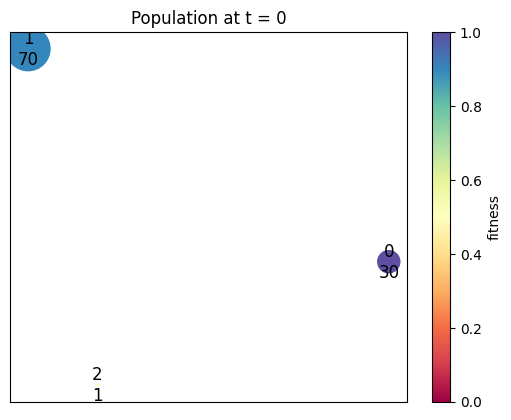

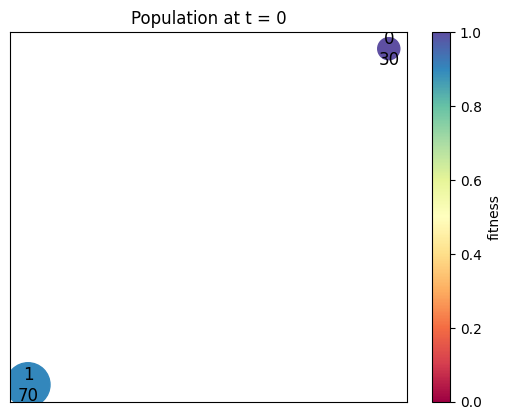

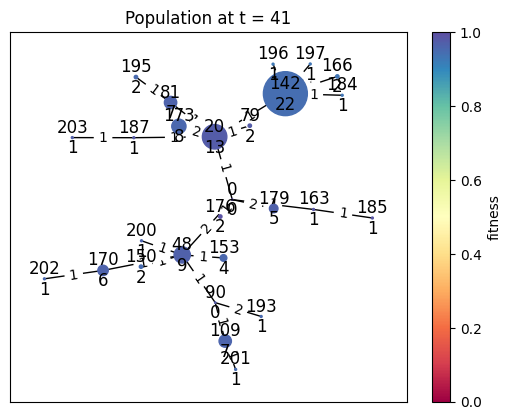

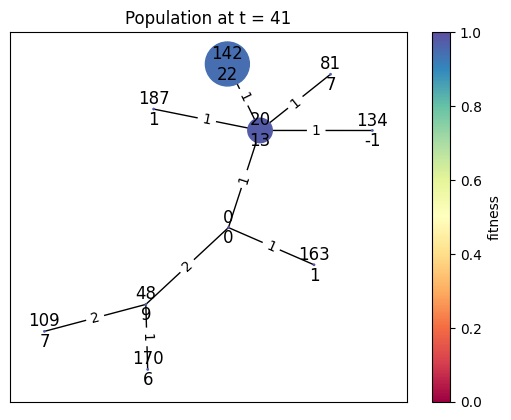

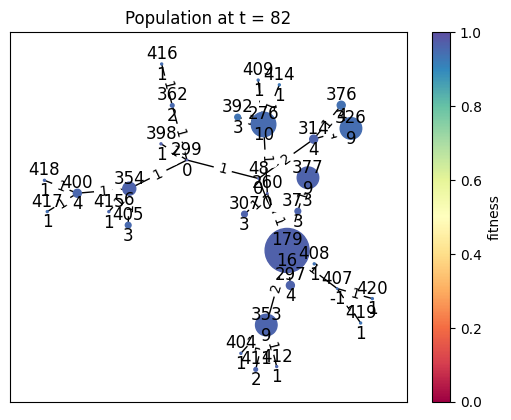

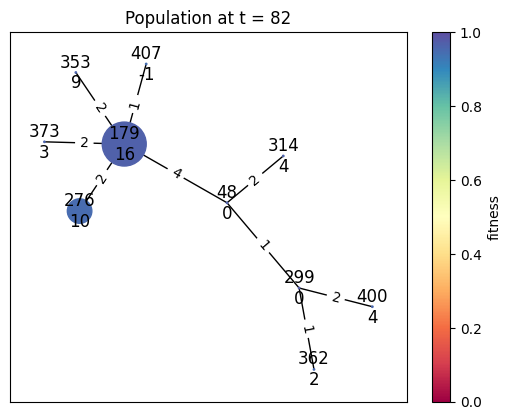

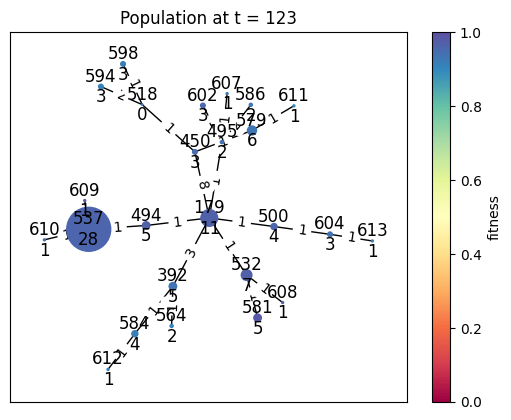

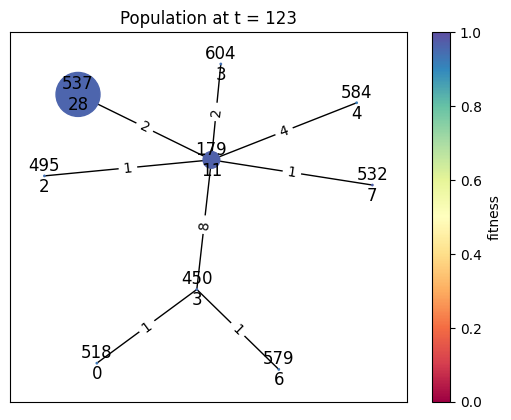

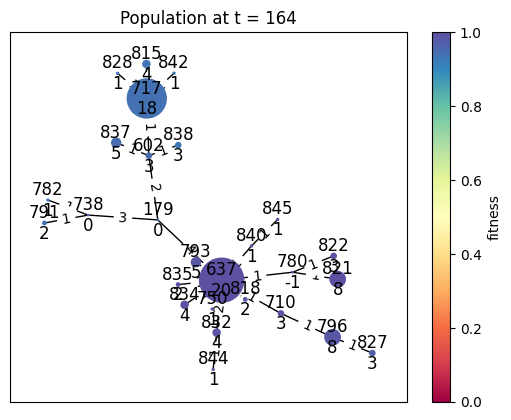

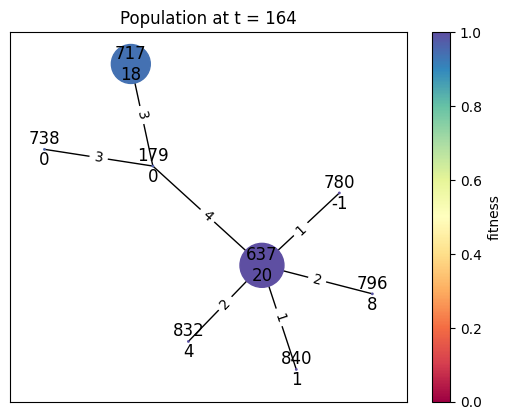

In [18]:
import numpy as np

from project_package.generate_pop import generate_initial_pop_unlinked
from project_package.simplify import remove_empty_leaves_and_rescale_edges
from project_package.plot import visualize_pop
from project_package.run_model import update_pop
from project_package.run_model import run_until_fixation

np.random.seed(666)
####################

# fitnesses=[0.5,0.3,0.6,0.4,0.2] # allele_id:fitness
# abundances=[30,70,1,0,0] # allele_id:abundance
# mutation_rate=0.1

fitnesses=[1,0.9,0.5,0.8,0.9] # allele_id:fitness
abundances=[30,70,1,0,0] # allele_id:abundance

G=generate_initial_pop_unlinked(fitnesses,abundances)


# G=generate_random_initial_pop_unlinked(n=2000,i=10)

mutation_rate=0.05

runtime=200
# G=generate_random_initial_pop(n)
results=run_until_fixation(G,mutation_rate,runtime,verbose=50)
print(len(results))
for i in range(0, len(results), int(np.ceil(len(results)/5))):
    plt.figure()
    # Generate plot1
    visualize_pop(results[i],i,view_node_labels=True)
    plt.figure()

    visualize_pop(results[i],i,abundance_threshold='10%',view_node_labels=True)
    # Show the plot in non-blocking mode
    plt.show(block=False)

In [28]:
np.random.seed(666)
mutation_rate=0.01

# fitnesses=[0.2,0.2,0.2,0.2,0.2] # allele_id:fitness
# abundances=[2,1,3,3,6] # allele_id:abundance
fitnesses=[0.95,0.9] # allele_id:fitness
abundances=[30,70] # allele_id:abundance

G=generate_initial_pop_unlinked(fitnesses,abundances)

# G=generate_random_initial_pop_unlinked(n=2000,i=10) #n=individuals, i=strains

runtime=2000
results=run_until_fixation(G,mutation_rate,runtime,stop_when_fixed=True,verbose=False)
print(len(results))

2002


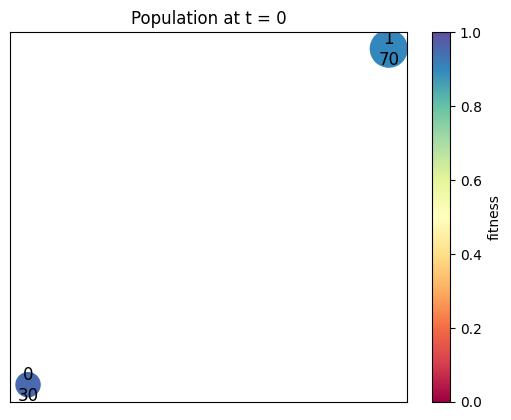

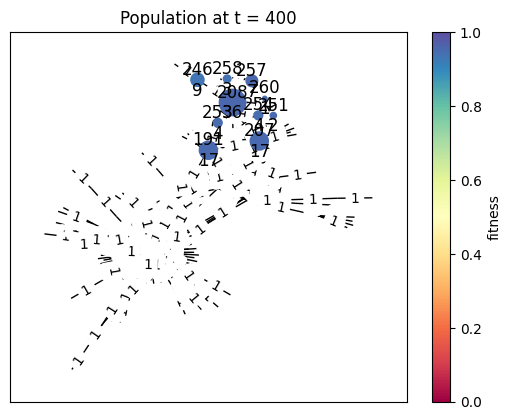

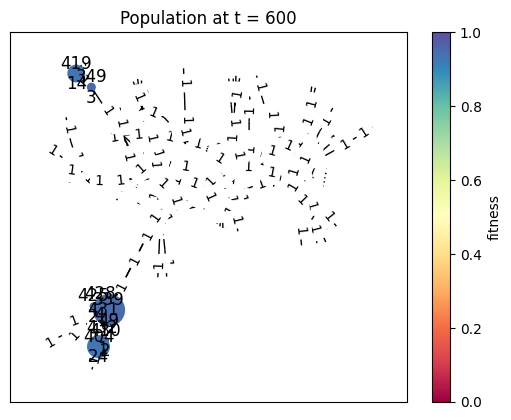

ModuleNotFoundError: No module named 'scipy'

<Figure size 640x480 with 0 Axes>

In [29]:
for i in [0,400,600,len(results)-1]:
    plt.figure()
    # Generate plot1
    visualize_pop(results[i],i)
    # Show the plot in non-blocking mode
    plt.show(block=False)

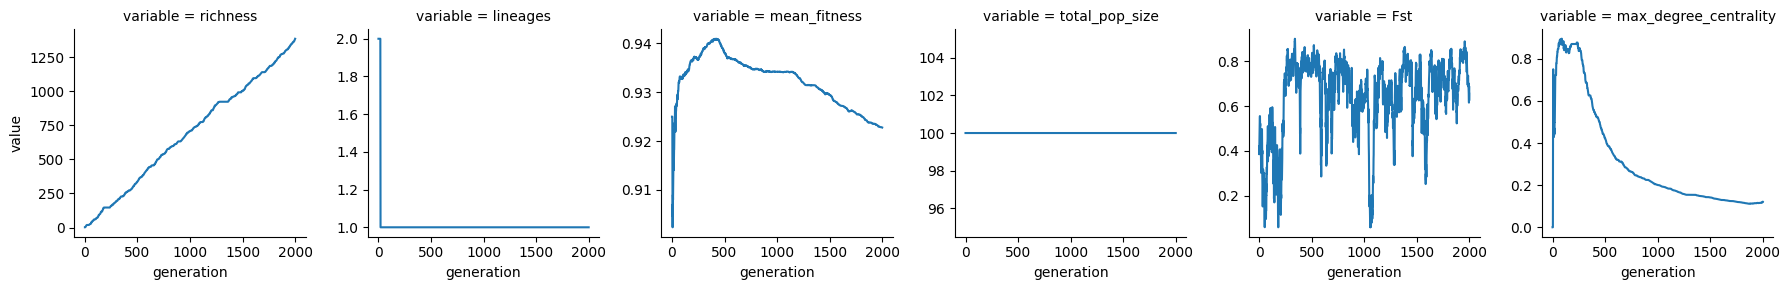

In [30]:
df_diversity=pd.DataFrame([])
for i in range(len(results)):
# for i in [0]:
    G=results[i]    
    richness=len(G.nodes)
    maxdist=sum([attr['distance'] for a,b,attr in nx.maximum_spanning_tree(G,weight='distance').edges(data=True)])
    mean_fitness=np.mean([attr['fitness'] for node,attr in G.nodes(data=True)])
    pop_size=sum([attr['abundance'] for node,attr in G.nodes(data=True)])
    gen_deg=nx.generalized_degree(G)
    lineages=nx.number_connected_components(G)
    max_degree_centrality=max([v for v in nx.degree_centrality(G).values()])
    Hi=1-sum([(attr['abundance']/pop_size)**2 for node,attr in G.nodes(data=True)])
    tmp=pd.DataFrame.from_dict({i:[richness,lineages,mean_fitness,pop_size,Hi,max_degree_centrality]}, orient='index',columns=['richness','lineages','mean_fitness','total_pop_size','Fst','max_degree_centrality'])
    tmp['generation']=i
    df_diversity=pd.concat([df_diversity, tmp], ignore_index=True)
df_diversity=df_diversity.melt(id_vars='generation')

g = sns.FacetGrid(df_diversity, col="variable",sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x="generation",y='value')


/home/maeperez/virtualenv/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


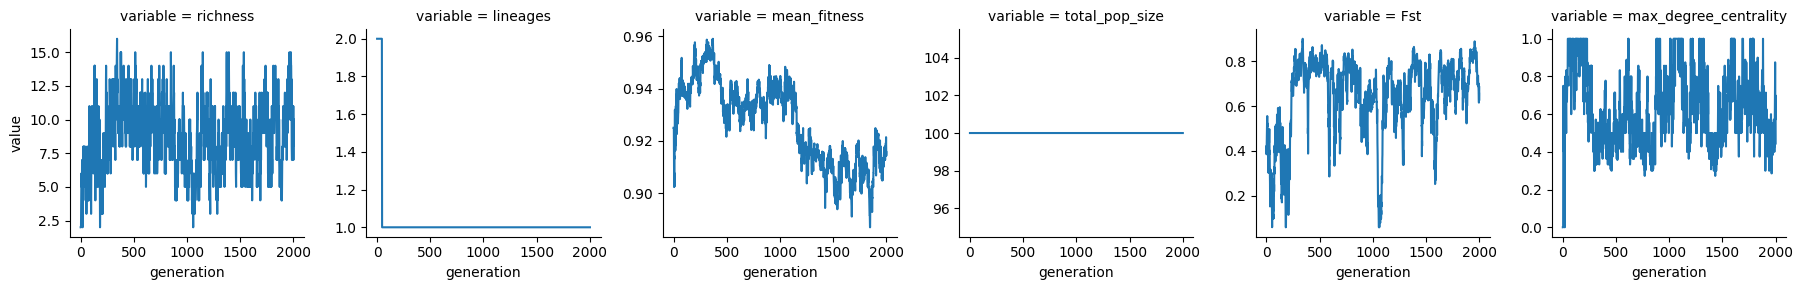

In [91]:
df_diversity=pd.DataFrame([])
for i in range(len(results)):
# for i in [0]:
    G=remove_empty_leaves_and_rescale_edges(results[i])  
    
    richness=len(G.nodes)
    maxdist=sum([attr['distance'] for a,b,attr in nx.maximum_spanning_tree(G,weight='distance').edges(data=True)])
    mean_fitness=np.mean([attr['fitness'] for node,attr in G.nodes(data=True)])
    pop_size=sum([attr['abundance'] for node,attr in G.nodes(data=True)])
    gen_deg=nx.generalized_degree(G)
    lineages=nx.number_connected_components(G)
    max_degree_centrality=max([v for v in nx.degree_centrality(G).values()])
    Hi=1-sum([(attr['abundance']/pop_size)**2 for node,attr in G.nodes(data=True)])
    tmp=pd.DataFrame.from_dict({i:[richness,lineages,mean_fitness,pop_size,Hi,max_degree_centrality]}, orient='index',columns=['richness','lineages','mean_fitness','total_pop_size','Fst','max_degree_centrality'])
    tmp['generation']=i
    df_diversity=pd.concat([df_diversity, tmp], ignore_index=True)
df_diversity=df_diversity.melt(id_vars='generation')

g = sns.FacetGrid(df_diversity, col="variable",sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x="generation",y='value')


In [ ]:
import seaborn as sns

df_abundance=pd.DataFrame([])
for i in range(len(results)):    
    G=remove_empty_nodes_and_reconnect(results[i])
    tmp=pd.DataFrame.from_dict({node:attr['abundance'] for node, attr in G.nodes(data=True)}, orient='index',columns=['abundance'])
    tmp['node']=tmp.index
    tmp['generation']=i
    tmp['n']=tmp.abundance.sum()
    df_abundance=pd.concat([df_abundance, tmp], ignore_index=True)
df_abundance['relab']=df_abundance.abundance/df_abundance.n
# df_abundance

In [ ]:
# print(df_abundance[:4])
my_colors={'0':'blue','1':'red'}
my_palette=dict([[k,my_colors[k]] if k in my_colors.keys() else [k,'grey'] for k in set(map(str,df_abundance.node))]) # all other alleles are colored "grey"

ax=sns.lineplot(data=df_abundance,x='generation',y=df_abundance.abundance/df_abundance.n,hue=map(str,df_abundance.node), palette=my_palette)
ax.set_ylim(0, 1)
ax.set(xlabel='Generations', ylabel='Relative abundance of alleles')
ax.get_legend().remove()

In [ ]:
my_colors={'0':'blue','1':'red'}
my_palette=dict([[k,my_colors[k]] if k in my_colors.keys() else [k,'grey'] for k in set(map(str,df_abundance.node))]) # all other alleles are colored "grey"

# now pivot df
piv = df_abundance.pivot(index='generation', columns='node', values='relab')

# plot
ax = piv.plot(kind='area', figsize=(9, 6))
ax.set_xlabel('Generations', fontsize=15)
ax.set_ylabel('Relative abundance of alleles', fontsize=15)

# move the legend
ax.get_legend().remove()


In [11]:
def generate_random_fisherlog_pop_unlinked(i=10):
    ''' generate a random initial population of i strains'''
    a = .995 # adjusted to match Ridgeia symbs CRISPR alleles/reads
    s = np.random.logseries(a, i)
    abundances=[k for k, v in Counter(s).items() for _ in range(v)] # species_count: individual_counts in these species
    fitnesses=np.random.rand(i) # an array of n random numbers generated between 0 and 1
    G = nx.Graph()
    G.add_nodes_from([i, {'abundance':abundances[i],'fitness':fitnesses[i]}] for i in range(len(fitnesses)))
        
    return(G)

generate_random_fisherlog_pop_unlinked(i=10)

In [ ]:
# np.random.seed(666)
mutation_rate=0.00000001

df_diversity=pd.DataFrame([])

for iteration in range(50):
    
    G=generate_random_fisherlog_pop_unlinked(i=200) #n=individuals, i=strains
    runtime=100
    results=run_until_fixation(G,mutation_rate,runtime,stop_when_fixed=True,force_pop_size_constant=False,verbose=False)
    
    ###########
    
    for i in range(len(results)):
        G=results[i]

        richness=len(G.nodes)
        maxdist=sum([attr['distance'] for a,b,attr in nx.maximum_spanning_tree(G,weight='distance').edges(data=True)])
        mean_fitness=np.mean([attr['fitness'] for node,attr in G.nodes(data=True)])
        pop_size=sum([attr['abundance'] for node,attr in G.nodes(data=True)])
        gen_deg=nx.generalized_degree(G)
        lineages=nx.number_connected_components(G)
        max_degree_centrality=max([v for v in nx.degree_centrality(G).values()])
        Hi=1-sum([(attr['abundance']/pop_size)**2 for node,attr in G.nodes(data=True)])
        tmp=pd.DataFrame.from_dict({i:[richness,lineages,mean_fitness,pop_size,Hi,max_degree_centrality]}, orient='index',columns=['richness','lineages','mean_fitness','total_pop_size','Fst','max_degree_centrality'])
        tmp['generation']=i
        tmp['iteration']=iteration
        df_diversity=pd.concat([df_diversity, tmp], ignore_index=True)


df_diversity=df_diversity.melt(id_vars=['iteration','generation'])

g = sns.FacetGrid(df_diversity, col="variable",sharex=True, sharey=False,hue='iteration')
g.map_dataframe(sns.lineplot, x="generation",y='value')

/home/maeperez/virtualenv/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


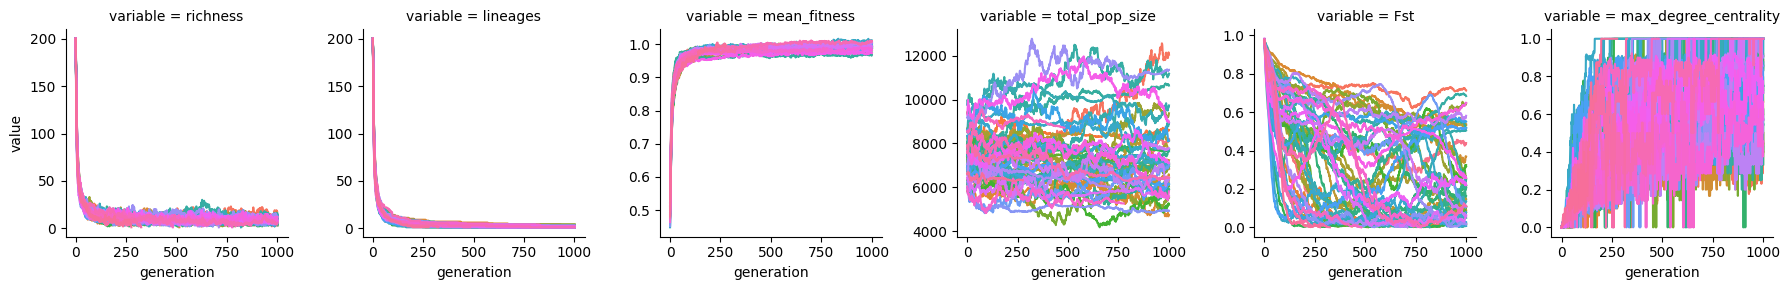

In [243]:
# np.random.seed(666)
mutation_rate=0.0001

df_diversity=pd.DataFrame([])

for iteration in range(50):
    
    G=generate_random_fisherlog_pop_unlinked(i=200) #n=individuals, i=strains
    runtime=1000
    results=run_until_fixation(G,mutation_rate,runtime,stop_when_fixed=True,force_pop_size_constant=False,verbose=False)
    
    ###########
    
    for i in range(len(results)):
        G=results[i]

        richness=len(G.nodes)
        maxdist=sum([attr['distance'] for a,b,attr in nx.maximum_spanning_tree(G,weight='distance').edges(data=True)])
        mean_fitness=np.mean([attr['fitness'] for node,attr in G.nodes(data=True)])
        pop_size=sum([attr['abundance'] for node,attr in G.nodes(data=True)])
        gen_deg=nx.generalized_degree(G)
        lineages=nx.number_connected_components(G)
        max_degree_centrality=max([v for v in nx.degree_centrality(G).values()])
        Hi=1-sum([(attr['abundance']/pop_size)**2 for node,attr in G.nodes(data=True)])
        tmp=pd.DataFrame.from_dict({i:[richness,lineages,mean_fitness,pop_size,Hi,max_degree_centrality]}, orient='index',columns=['richness','lineages','mean_fitness','total_pop_size','Fst','max_degree_centrality'])
        tmp['generation']=i
        tmp['iteration']=iteration
        df_diversity=pd.concat([df_diversity, tmp], ignore_index=True)


df_diversity=df_diversity.melt(id_vars=['iteration','generation'])

g = sns.FacetGrid(df_diversity, col="variable",sharex=True, sharey=False,hue='iteration')
g.map_dataframe(sns.lineplot, x="generation",y='value')

In [2]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Define the colors and their associated probabilities
colors = ['blue', 'red', 'green']
probabilities = [0.2, 0.3, 0.5]

# Determine the count of each color in 100 draws
counts = np.random.multinomial(100, probabilities)
print(counts)
color_counts = dict(zip(colors, counts))

print(color_counts)

[20 32 48]
{'blue': 20, 'red': 32, 'green': 48}


In [12]:
a=[2,2,2]
b=[5,5,5]
c=5
np.array(a)*5
np.array(a)*0.00001

array([2.e-05, 2.e-05, 2.e-05])

In [43]:
a={1:10,2:10}
b={1:3,2:3}
# a.update(a-b)

# np.array(a.values())/2
[val/2 for val in a.values()]

[5.0, 5.0]

# split pop

[(1, 3), (1, 4), (1, 5), (1, 6), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12)]
[(1, 3), (1, 4), (1, 5), (1, 6), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12)]


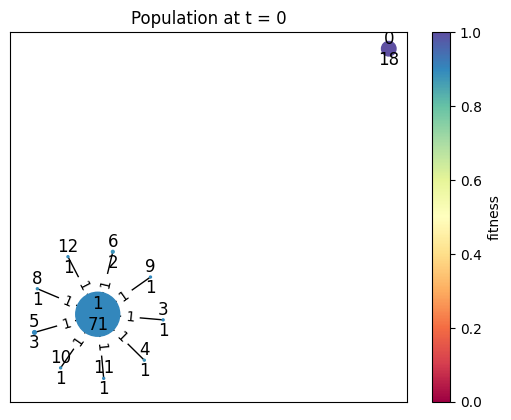

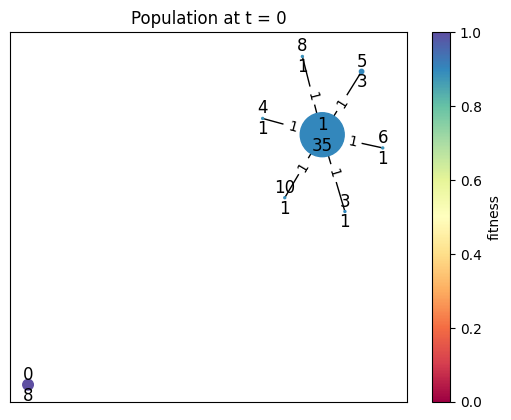

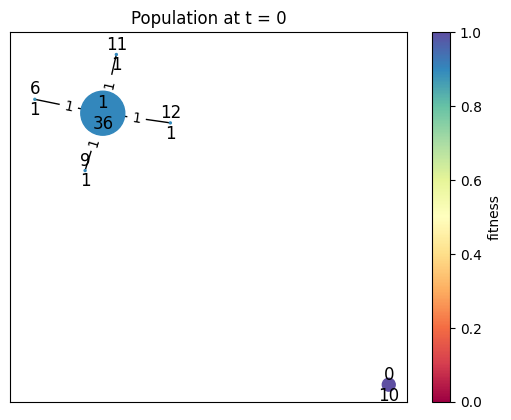

In [21]:
from collections import Counter
import random
from project_package.generate_pop import SymPop
from project_package.run_model import split_pop_in_half

##########
np.random.seed(666)

TS=SymPop(results[2].copy())
TS.visualize_pop()


G=TS.G.copy()
newG1,newG2=split_pop_in_half(G)

# print(newG1.edges())
plt.figure()
visualize_pop(newG1,show_empty=False)


# print(newG2.edges())
plt.figure()
visualize_pop(newG2,show_empty=False)


# Run_until_fixation_splits

In [6]:
###### work in progress######

def run_update_with_splits(G, mutation_rate, runtime, growth_factor=1, stop_when_fixed=True, verbose=0,t=0):

    results={0:G}

    G_plus1=update_pop(G,mutation_rate,growth_factor=growth_factor)
    # G_plus1=remove_empty_leaves_and_rescale_edges(G_plus1)

    if sum([attr['abundance'] for node,attr in G_plus1.nodes(data=True)])>100:
        for new_G in split_pop_in_half(G_plus1):
            if t==runtime:
                return(G_plus1)
            else:
                return(run_update_with_splits(new_G, mutation_rate, runtime, growth_factor=growth_factor, stop_when_fixed=stop_when_fixed, verbose=verbose,t=t))

        
    G=G_plus1.copy()
    results.update({t:G})
    
    if verbose>0:
        if t%verbose==0:
            print(t)
    if stop_when_fixed==True:
        if len((results[t]).nodes())==1:
            return(results)
            break
    
    if t>runtime:
        return(results)
        break    



#############


import numpy as np

from project_package.generate_pop import generate_initial_pop_unlinked
from project_package.simplify import remove_empty_leaves_and_rescale_edges
from project_package.plot import visualize_pop
from project_package.run_model import update_pop
from project_package.run_model import run_until_fixation

np.random.seed(666)
####################

fitnesses=[1,0.9,0.5,0.8,0.9] # allele_id:fitness
abundances=[30,70,1,0,0] # allele_id:abundance
G=generate_initial_pop_unlinked(fitnesses,abundances)

mutation_rate=0.05

runtime=200

results=run_update_with_splits(G,mutation_rate,runtime,verbose=50)


print(len(results))
for i in range(0, len(results), int(np.ceil(len(results)/5))):
    plt.figure()
    # Generate plot1
    visualize_pop(results[i],i,view_node_labels=True)
    plt.figure()

    visualize_pop(results[i],i,abundance_threshold='10%',view_node_labels=True)
    # Show the plot in non-blocking mode
    plt.show(block=False)

SyntaxError: 'break' outside loop (2905801396.py, line 27)

# 7. grow_and_steady

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
50
100
max population size reached:  100000
150
200
250
300
max runtime reached:  345
347
i =  0
i =  70
i =  140
i =  210
i =  280


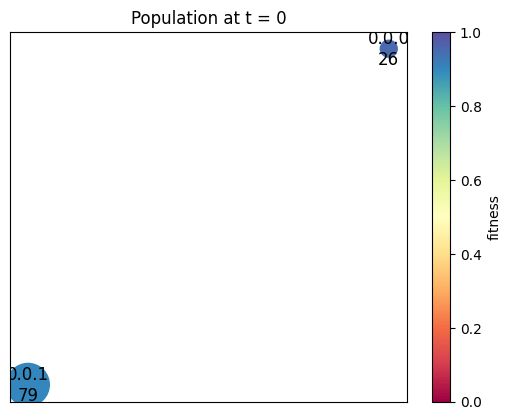

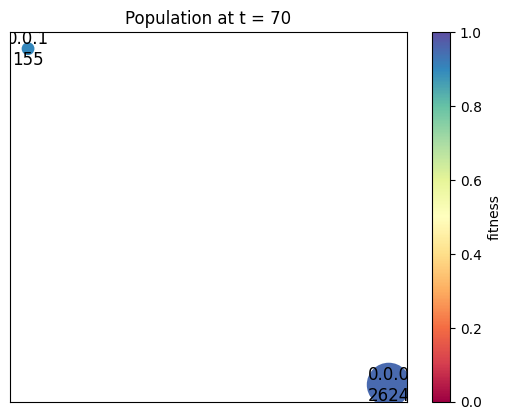

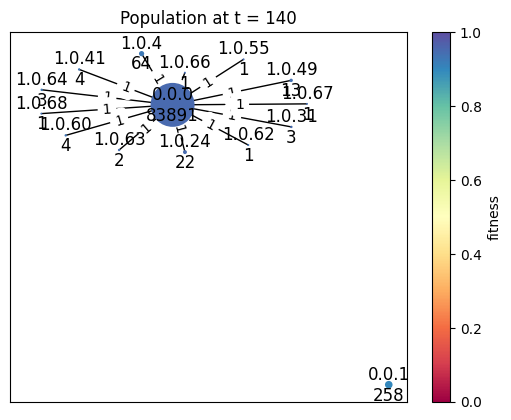

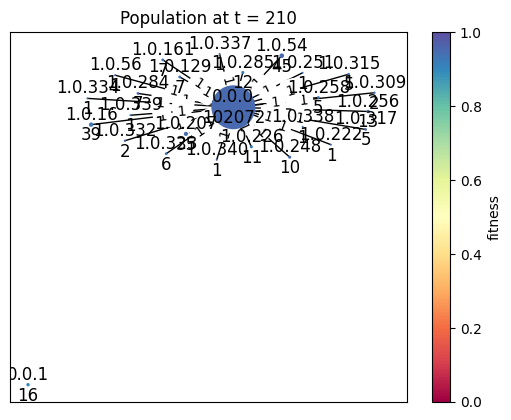

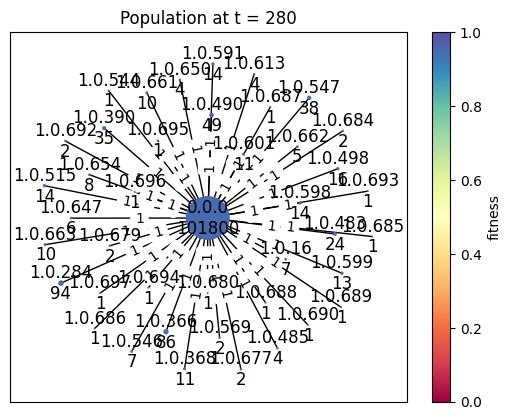

In [21]:
import pandas as pd
import sys
sys.path.append("/Users/maeva/Desktop/Modeling_trophosome/src/")
from project_package.generate_pop import generate_initial_pop_unlinked
from project_package.update_pop import update_pop3
from project_package.run_model import run_until_fixation3, grow_and_steady

from project_package.plot import visualize_pop

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

## params
np.random.seed(666)
mutation_rate=0.00005
growth_factor=1.05
fitnesses=[0.95,0.9] # allele_id:fitness
abundances=[30,70] # allele_id:abundance
steady_state_runtime=200
max_runtime=500
new_avail_id='1.0.0'
pop_size_thr=100000
simplify=1
verbose=50

sampling_rate=1

## init tree
subsampleG=generate_initial_pop_unlinked(fitnesses,abundances)
subsampleG=nx.relabel_nodes(subsampleG, {0:'0.0.0',1:'0.0.1'})
# visualize_pop(subsampleG)
results={0:subsampleG}
## run function
t=1
results.update(grow_and_steady(subsampleG, mutation_rate, steady_state_runtime,
                        max_runtime, new_avail_id, growth_factor=growth_factor,
                        stop_when_fixed=True, pop_size_thr=pop_size_thr, simplify=simplify,
                        verbose=verbose, t=t,sampling_rate=sampling_rate))



## See results

print(len(results))
for i in range(0, len(results), int(np.ceil(len(results)/5))):
    plt.figure()
    # Generate plot1
    print("i = ",i)
    visualize_pop(results[i],i,view_node_labels=True)
